In [1]:
# Importing all libraries :

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [2]:
#read data
cars_data = pd.read_csv('cars_price.csv')
cars_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# Shape of the data :
cars_data.shape

(205, 26)

In [4]:
# Dataframe information :
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# Describing the data :
cars_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
cars_data= cars_data.drop('normalized-losses',axis=1)

In [7]:
#check for null values
cars_data.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

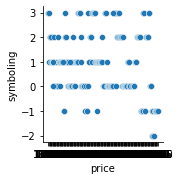

In [8]:
# Exploring "symboling" column :
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)

DATA EXPLORATION - exploring columns

In [9]:
cars_data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [10]:
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [11]:
cars_data['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [12]:
cars_data[['num-of-doors']].head()

,num-of-doors
0,two
1,two
2,two
3,four
4,four


In [13]:
def numbe(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['num-of-doors'] = cars_data[['num-of-doors']].apply(numbe)
cars_data[['num-of-doors']].head()

,num-of-doors
0,2.0
1,2.0
2,2.0
3,4.0
4,4.0


In [14]:
# Rechecking :
cars_data['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [15]:
cars_data['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [16]:
cars_data['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [17]:
cars_data['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [18]:
cars_data['wheel-base'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheel-base, dtype: int64

In [19]:
cars_data['length'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: length, dtype: int64

In [20]:
cars_data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [21]:
cars_data['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [22]:
cars_data['num-of-cylinders'].head()

0    four
1    four
2     six
3    four
4    five
Name: num-of-cylinders, dtype: object

In [23]:
def convert_num(x):
    return x.map({'four': 4,
                  'six': 6,
                  'five': 5,
                  'eight': 8,
                  'two': 2,
                  'three': 3,
                  'twelve': 12}
                 )

cars_data['num-of-cylinders'] = cars_data[['num-of-cylinders']].apply(convert_num)
cars_data['num-of-cylinders'].head()

0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

In [24]:
# Re-checking :
cars_data['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [25]:
cars_data['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

DATA VISUALIZATION

In [26]:
cars_data['price'].replace('?',0,inplace=True)
cars_data['bore'].replace('?',0,inplace=True)
cars_data['stroke'].replace('?',0,inplace=True)
cars_data['horsepower'].replace('?',0,inplace=True)
cars_data['peak-rpm'].replace('?',0,inplace=True)

In [28]:
convert_type = {
    'bore':float,
    'stroke':float,
    'horsepower':int,
    'peak-rpm':int,
    'price':float,
}
cars_data = cars_data.astype(convert_type)

In [29]:
#grouping numeric columns
cars_numeric = cars_data.select_dtypes(include =['int64','float64','int32'])
cars_numeric.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


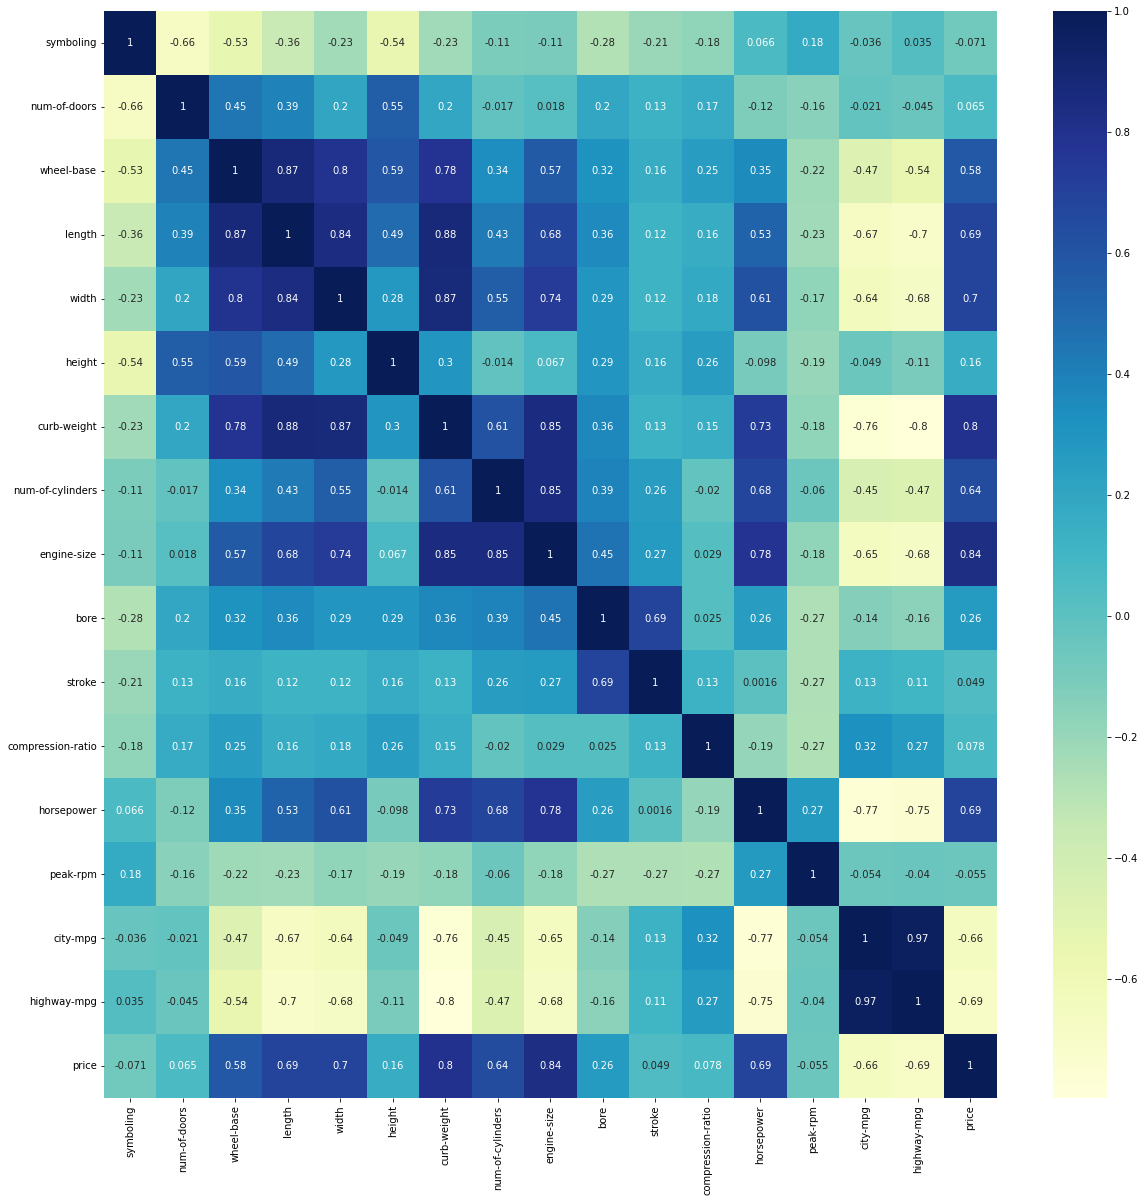

In [31]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower

In [32]:
#grouping categorical columns
categorical_cols = cars_data.select_dtypes(include=['object'])
categorical_cols.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


DATA PREPARATION

In [33]:
# Creating dummies for categorical data :
cars_dummies = pd.get_dummies(cars_data[categorical_cols.columns])

In [34]:
#concatenation of dummies with actual data
car_df = pd.concat([cars_data, cars_dummies], axis=1)

In [35]:
car_df = car_df.drop(['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location',
                      'engine-type', 'fuel-system', 'make'], axis=1)

In [36]:
car_df.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# car_df=car_df.drop("num-of-cylinders",axis=1)
car_df.fillna(method="ffill")

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.0,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,4.0,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,1,0,0,0,0,0,0,1,0,0
203,-1,4.0,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [117]:
#split data into train(80%) and test(20%) data 
df_train, df_test = train_test_split(car_df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [118]:
df_train.shape

(162, 68)

In [119]:
df_test.shape

(41, 68)

In [120]:
cars_numeric.columns

Index(['symboling', 'num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [121]:
col_list = ['symboling', 'num-of-doors', 'wheel-base', 'length', 'width','height', 'curb-weight',  'engine-size', 'bore',
            'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [122]:
#Rescaling the data
scaler = StandardScaler()

In [123]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [124]:
df_train.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,162.000000,1.620000e+02,1.620000e+02,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,-3.426614e-18,-1.617362e-16,-1.274701e-16,9.896062e-16,3.396460e-15,-4.680755e-16,-3.906340e-16,4.388889,-9.663052e-17,-6.268991e-16,...,0.061728,0.024691,0.061728,0.358025,0.018519,0.080247,0.006173,0.438272,0.030864,0.006173
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.154252,1.003101e+00,1.003101e+00,...,0.241408,0.155664,0.241408,0.480906,0.135235,0.272517,0.078567,0.497714,0.173486,0.078567
min,-2.307605e+00,-1.132118e+00,-1.928297e+00,-2.558864e+00,-2.466580e+00,-2.388643e+00,-1.981495e+00,2.000000,-1.509003e+00,-5.553624e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.751508e-01,-1.132118e+00,-6.764787e-01,-5.893863e-01,-8.323719e-01,-7.181395e-01,-7.873085e-01,4.000000,-6.640194e-01,-3.140960e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.410763e-01,8.833005e-01,-3.199482e-01,-1.048323e-01,-2.140229e-01,1.171120e-01,-2.602129e-01,4.000000,-3.588863e-01,6.383720e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.573034e-01,8.833005e-01,5.594937e-01,7.470449e-01,4.484939e-01,7.435506e-01,7.333763e-01,4.000000,3.687387e-01,5.963794e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.773530e+00,8.833005e-01,3.506813e+00,2.677446e+00,2.833554e+00,2.384223e+00,2.862899e+00,12.000000,4.711017e+00,1.214815e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
car_df = car_df[np.isfinite(car_df).all(1)]

In [126]:
y_train = df_train.pop('price')
X_train = df_train

In [127]:
# Linear Regression
lr = LinearRegression()
final_model = lr.fit(X_train, y_train)

In [128]:
df_test[col_list] = scaler.transform(df_test[col_list])
y_test = df_test.pop('price')
X_test = df_test

In [129]:
y_pred = final_model.predict(X_test)

MODEL EVALUATION

In [130]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test,y_pred)

In [131]:
#mean-squared-error
mse

1.370905989325507e+24

In [132]:
#R2 score
R2_score = r2_score(y_test,y_pred)
R2_score

-1.8047086034893637e+24

In [133]:
mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)

In [134]:
#mean-absolute-error
mae

242614073893.56168